# Intialize

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class as Class_sz

In [39]:
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators and to avoid any ambiguity when comparing with camb. 
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665   
}

# Linear bias calculation

Here we compare the high-precision cl^kk emulators (`lCl`) from `class` to the Limber integral for lensing using Pk non-linear high-precision emulator (`lens_lens_hf`) computed by `classy_sz`.

In [61]:
%%time
cosmo = Class_sz()

cosmo.set(cosmo_params)
cosmo.set({
'output': 'lCl,lens_lens_hf',

'ell_max': 60000.0,
'ell_min': 2.0,
'dlogell': 0.1,
'dell': 0,
'z_max': 150.,


'non_linear':'hmcode',


'cosmo_model':0,


})
cosmo.compute_class_szfast()
cl_kk_hm = cosmo.cl_kk

CPU times: user 13.6 s, sys: 586 ms, total: 14.2 s
Wall time: 1.65 s


(1e-10, 3e-07)

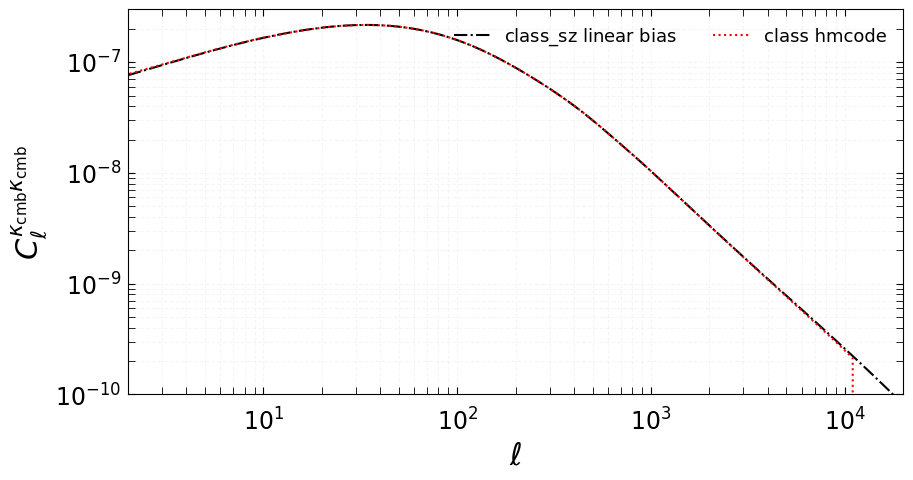

In [62]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax3) = plt.subplots(1,1,figsize=(10,5))

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$C_\ell^{\kappa_\mathrm{cmb}\kappa_\mathrm{cmb}}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)

ell = np.asarray(cl_kk_hm()['ell'])
fac = ell*(ell+1.)/2./np.pi

cl_kk_hf = np.asarray(cl_kk_hm()['hf'])/fac


ax.plot(ell,cl_kk_hf,ls='-.',c='k',label=r'class_sz $\mathrm{linear\,\,bias}$')

l_class = cosmo.lensed_cl()['ell']
cl_kk_class = cosmo.lensed_cl()['pp']*(cosmo.lensed_cl()['ell']*(cosmo.lensed_cl()['ell']+1.)/2.)**2.
_, = ax.plot(l_class,
                     cl_kk_class,
                     ls=':',c='r',label=r'class hmcode')


plt.legend(frameon=True,framealpha=0,ncol=2,fontsize=13,loc=1)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(2e0,2.e4)
ax.set_ylim(1e-10,3e-7)

array([1.02246231, 1.01643319, 1.01282134, 1.01165906, 1.01307473,
       1.0089313 , 1.0071508 , 1.00796005, 1.0053934 , 1.00612597,
       1.00471773, 1.00568457, 1.00445182, 1.00449016, 1.00492564,
       1.0051569 , 1.00513733, 0.9957529 , 0.99604369, 0.99658731,
       0.99728729, 0.99778342, 0.99800629, 0.99861872, 0.9988884 ,
       0.99913721, 0.99946583, 0.9995415 , 0.99978116, 0.99982597,
       1.00004125, 1.00006864, 1.00022356, 1.00028431, 1.00039484,
       1.00038761, 1.00020189, 1.00040901, 1.00039215, 1.00019146,
       1.00032403, 1.00036707, 1.00034678, 1.00054002, 1.00068045,
       1.00076697, 1.00075577, 1.00065332, 1.00050518, 1.00061407,
       1.00054582, 1.00076488, 1.00108307, 1.00127222, 1.0013557 ,
       1.00146254, 1.00175459, 1.00160129, 1.00160843, 1.00160634,
       1.00175154, 1.0016668 , 1.00136418, 1.00131432, 1.00105524,
       1.00040491, 0.99994448, 0.99929595, 0.99862825, 0.99773469,
       0.99685041, 0.99580763, 0.99455222, 0.99314178, 0.99156

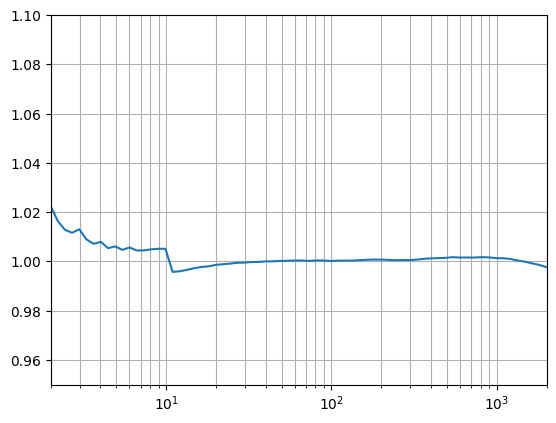

In [63]:
r = np.interp(ell,l_class,cl_kk_class)/cl_kk_hf
plt.plot(ell,r)
plt.xscale('log')
plt.ylim(0.95,1.10)
plt.xlim(2,2e3)
plt.grid(which='both')
r